Code for BC2407 Project, Neural Network

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1



Datasource: 
https://www.kaggle.com/brandao/diabetes

minor edit to readmitted to combined both <30 and >30 days into 1 single value

In [ ]:
!pip install clevercsv 
#CleverCSV provides a drop-in replacement for the Python csv package with improved dialect detection for messy CSV files.

     |████████████████████████████████| 93 kB 2.1 MB/s 


In [ ]:
!pip install pyyaml h5py

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow import keras
import clevercsv as csv
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#bug hunting/fixing here
with open("diabetic_data.csv", "r", encoding="utf-8") as input, open("new_dataset.csv", "w", encoding="utf-8") as output:
  w = csv.writer(output)
  for record in csv.reader(input):
    w.writerow(tuple(s.replace("\n", '') for s in record))

In [ ]:
df = csv.read_dataframe("new_dataset.csv", delimiter = ',', quotechar = '', escapechar = '\\', encoding = 'utf-8', low_memory = False)

In [ ]:
#remove na if any
#for col in df:
#  df[col] = df[col].fillna(0)

df.dropna()

df = df.applymap(lambda s:s.lower() if type(s) == str else s)

In [ ]:
#split by what needs to be one-hot encoded

categorical_columns = ['race', 'gender', 'age', 'weight', 'admission_source_id', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
                      'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
                      'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed']

kept_columns = ['admission_type_id', 'discharge_disposition_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'readmitted']

In [ ]:
df = df.astype(str)

In [ ]:
df['admission_type_id'] = df['admission_type_id'].astype(float)
df['discharge_disposition_id'] = df['discharge_disposition_id'].astype(float)
df['time_in_hospital'] = df['time_in_hospital'].astype(float)
df['num_lab_procedures'] = df['num_lab_procedures'].astype(float)
df['num_procedures'] = df['num_procedures'].astype(float)
df['num_medications'] = df['num_medications'].astype(float)
df['number_outpatient'] = df['number_outpatient'].astype(float)
df['number_emergency'] = df['number_emergency'].astype(float)
df['number_inpatient'] = df['number_inpatient'].astype(float)
df['number_diagnoses'] = df['number_diagnoses'].astype(float)
df['readmitted'] = df['readmitted'].astype(float)

In [ ]:
df = df[['admission_type_id', 'discharge_disposition_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'race', 'gender', 'age', 'weight', 'admission_source_id', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride','acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']]

In [ ]:
df.head()

,admission_type_id,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,6.0,25.0,1.0,41.0,0.0,1.0,0.0,0.0,0.0,1.0,...,no,no,no,no,no,no,no,no,no,0.0
1,1.0,1.0,3.0,59.0,0.0,18.0,0.0,0.0,0.0,9.0,...,no,up,no,no,no,no,no,ch,yes,1.0
2,1.0,1.0,2.0,11.0,5.0,13.0,2.0,0.0,1.0,6.0,...,no,no,no,no,no,no,no,no,yes,0.0
3,1.0,1.0,2.0,44.0,1.0,16.0,0.0,0.0,0.0,7.0,...,no,up,no,no,no,no,no,ch,yes,0.0
4,1.0,1.0,1.0,51.0,0.0,8.0,0.0,0.0,0.0,5.0,...,no,steady,no,no,no,no,no,ch,yes,0.0


In [ ]:
#check columns/datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89622 entries, 0 to 89621
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   admission_type_id         89622 non-null  float64
 1   discharge_disposition_id  89622 non-null  float64
 2   time_in_hospital          89622 non-null  float64
 3   num_lab_procedures        89622 non-null  float64
 4   num_procedures            89622 non-null  float64
 5   num_medications           89622 non-null  float64
 6   number_outpatient         89622 non-null  float64
 7   number_emergency          89622 non-null  float64
 8   number_inpatient          89622 non-null  float64
 9   number_diagnoses          89622 non-null  float64
 10  race                      89622 non-null  object 
 11  gender                    89622 non-null  object 
 12  age                       89622 non-null  object 
 13  weight                    89622 non-null  object 
 14  admiss

In [ ]:
#one-hot encode strings using function below
#columns to encode = race, gender, age, weight, payer_code, medical_specialty, admission_source_id, discharge_disposition_id, admission_type_id, diag_1, diag_2, diag_3, max_glu_serum,
#A1Cresult, metformin... readmitted (basically everything), note diagnosis are coded, therefore required to be one-hot encoded

def one_hot_cat_column(feature_name, vocab):
  return tf.feature_column.indicator_column(
      tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocab)
  )


In [ ]:
#encode the data


feature_columns = []
for feature_name in categorical_columns:
  #one-hot encode stuff
  vocabulary = df[feature_name].unique()
  feature_columns.append(one_hot_cat_column(feature_name, vocabulary))

for feature_name in kept_columns:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, 
                                                          dtype=tf.float32))


In [ ]:
#example of encoding working properly


from tensorflow.python.feature_column.feature_column_v2 import categorical_column_with_vocabulary_list
example = dict(df.head(1))
class_fc = tf.feature_column.indicator_column(tf.feature_column.categorical_column_with_vocabulary_list('gender', ('female', 'male', 'unknown/invalid')))
print('Feature values: "{}"'.format(example['gender'].iloc[0]))
print('One-hot encoded: ', tf.keras.layers.DenseFeatures([class_fc])(example).numpy())


Feature values: "female"
One-hot encoded:  [[1. 0. 0.]]


In [ ]:
#split the data

#shuffle the data first to remove possible bias from the order in which the data was inputted
df2 = df.sample(frac=1).reset_index(drop=True)

target_ = df2['readmitted'].values
#train_ = df2.drop(columns=['readmitted']).values
train_ = df2[['admission_type_id', 'discharge_disposition_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'race', 'gender', 'age', 'weight', 'admission_source_id', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride','acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed']].values

total_x = df2.shape[0]
split_x = int(total_x * 0.7) #cast to int to drop the decimals if any

#training data
train_in = train_[-split_x:]
train_target = target_[-split_x:]

#verification data
val_in = train_[:-split_x]
val_target = target_[:-split_x]

#for later visual stuff
df_data = df2[:-split_x]
labels = df_data.values

In [ ]:
num_examples = len(train_in)

#shuffle again
def make_input_fn(X, y, n_epochs=None, shuffle=True):
  def input_fn():
    dataset = tf.data.Dataset.from_tensor_slices((dict(X), y))
    if shuffle:
      dataset = dataset.shuffle(num_examples)
    dataset = dataset.repeat(n_epochs)
    dataset = dataset.batch(num_examples)
    return dataset
  return input_fn

train_input_fn = make_input_fn(df2[-split_x:], train_target)
eval_input_fn = make_input_fn(df2[:-split_x], val_target, shuffle=False, n_epochs=1)

In [ ]:
#clear backend stuff
tf.keras.backend.clear_session()

In [ ]:
linear_est = tf.estimator.LinearClassifier(feature_columns, model_dir='./checkpoints/my_checkpoint')

tf.keras.backend.set_floatx('float64')
linear_est.train(train_input_fn, max_steps = 400)

result = linear_est.evaluate(eval_input_fn)
print(pd.Series(result))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': './checkpoints/my_checkpoint', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
Use Variable.read_value. Variables in 2.X a

/usr/local/lib/python3.7/dist-packages/tensorflow_estimator/python/estimator/canned/linear.py:1478: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  getter=tf.compat.v1.get_variable)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into ./checkpoints/my_checkpoint/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 0.6931472, step = 0
INFO:tensorflow:global_step/sec: 0.383461
INFO:tensorflow:loss = 0.26083198, step = 100 (260.787 sec)
INFO:tensorflow:global_step/sec: 0.382613
INFO:tensorflow:loss = 0.17491382, step = 200 (261.361 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 226...
INFO:tensorflow:Saving checkpoints for 226 into ./checkpoints/my_checkpoint/model.ckpt.
INFO:tensorflow:Calling checkpoi

INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.7/dist-packages/tensorflow_estimator/python/estimator/canned/linear.py:1478: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  getter=tf.compat.v1.get_variable)


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./checkpoints/my_checkpoint/model.ckpt-400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


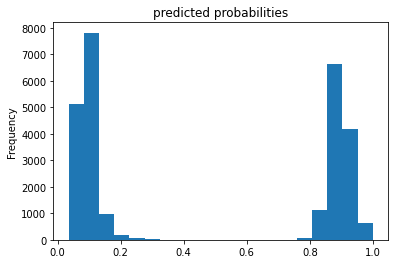

In [ ]:
#analyze the model
pred_dicts = list(linear_est.predict(eval_input_fn))
probs = pd.Series([pred['probabilities'][1] for pred in pred_dicts])

probs.plot(kind='hist', bins=20, title='predicted probabilities')
plt.show()

In [ ]:
#use a different model 
est = tf.estimator.BoostedTreesClassifier(feature_columns, n_batches_per_layer=1, n_trees=500, 
                                          model_dir='./checkpoints2/my_checkpoint')

est.train(train_input_fn, max_steps=420)

result = est.evaluate(eval_input_fn)
print(pd.Series(result))

Instructions for updating:
Boosted Trees kernels in TF are deprecated. Please use TensorFlow Decision Forests instead (https://github.com/tensorflow/decision-forests)
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': './checkpoints2/my_checkpoint', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '

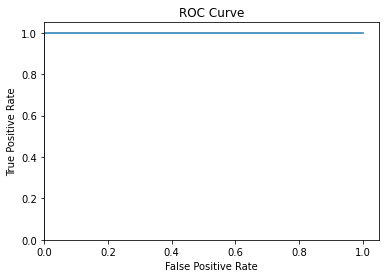

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(val_target, probs)
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim(0,)
plt.ylim(0,)
plt.show()

In [ ]:
#use another model (basically the same as prev model) but with some kind of whitebox/explainability for its prediction

params = {
    'n_batches_per_layer': 1,
    'center_bias': True
}

est = tf.estimator.BoostedTreesClassifier(feature_columns, model_dir='./checkpoints3/my_checkpoint', **params)
est.train(train_input_fn, max_steps = 700)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': './checkpoints3/my_checkpoint', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_

In [ ]:
#plot contribution of each feature

def _get_color(value):
    """To make positive DFCs plot green, negative DFCs plot red."""
    green, red = sns.color_palette()[2:4]
    if value >= 0: return green
    return red

def _add_feature_values(feature_values, ax):
    """Display feature's values on left of plot."""
    x_coord = ax.get_xlim()[0]
    OFFSET = 0.15
    for y_coord, (feat_name, feat_val) in enumerate(feature_values.items()):
        t = plt.text(x_coord, y_coord - OFFSET, '{}'.format(feat_val), size=12)
        t.set_bbox(dict(facecolor='white', alpha=0.5))
    from matplotlib.font_manager import FontProperties
    font = FontProperties()
    font.set_weight('bold')
    t = plt.text(x_coord, y_coord + 1 - OFFSET, 'feature\nvalue',
    fontproperties=font, size=12)

def plot_example(example):
    TOP_N = 15 # View top 15 features.
    sorted_ix = example.abs().sort_values()[-TOP_N:].index  # Sort by magnitude.
    example = example[sorted_ix]
    colors = example.map(_get_color).tolist()
    ax = example.to_frame().plot(kind='barh',
                          color=colors,
                          legend=None,
                          alpha=0.75,
                          figsize=(10,6))
    ax.grid(False, axis='y')
    ax.set_yticklabels(ax.get_yticklabels(), size=14)

    # Add feature values.
    _add_feature_values(df_data.iloc[ID][sorted_ix], ax)
    return ax

In [ ]:
pred_dicts = list(est.experimental_predict_with_explanations(eval_input_fn))
df_dfc = pd.DataFrame([pred['dfc'] for pred in pred_dicts])
probs = pd.Series([pred['probabilities'][1] for pred in pred_dicts])

INFO:tensorflow:Using config: {'_model_dir': './checkpoints3/my_checkpoint', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalize

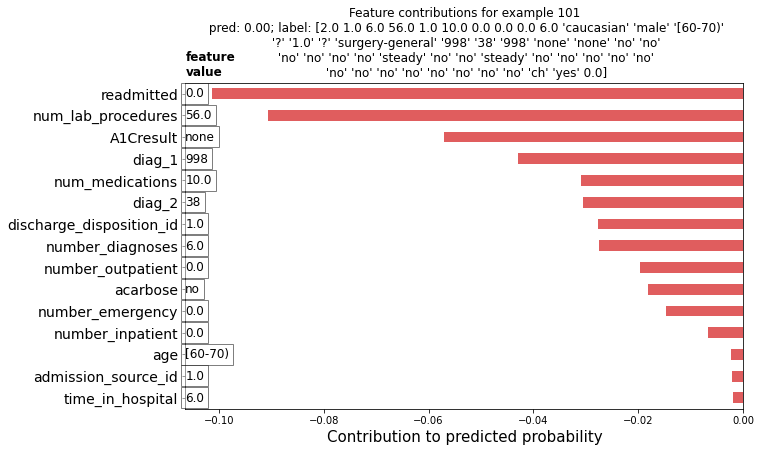

In [ ]:
ID = 101 #swap as you wish
example = df_dfc.iloc[ID] #choose X example from evaluation set
TOP_N = 15 #view top 15 features
ax = plot_example(example)
ax.set_title('Feature contributions for example {}\n pred: {:1.2f}; label: {}'.format(ID, probs[ID], labels[ID]))
ax.set_xlabel('Contribution to predicted probability', size=15)
plt.show()